In [1]:
import numpy as np
import pandas
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import os

In [2]:
moods = ['happy', 'focus', 'relax', 'fitness', 'party', 'romantic', 'sad']
path = './dataset.csv'

client_id = '2d0aef4304064e67bdce269495c514ba'
client_secret = 'b0b2829b32cd4963a5de4c35528faf1d'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

def create_initial_dataset(moods: list) -> pandas.DataFrame:
    
    search_results = []
    songs = []

    #collect 10 playlist IDs for each mood
    for m in moods:

        search_query = m
        result = sp.search(search_query, type='playlist')
        search_results.append(result)

    print('Playlists scraped successfully...')

    #collect audio features from every son m the collected playlists are composed of
    for i in range(len(search_results)):
        print(moods[i], ':')
        for j in search_results[i]['playlists']['items']:
            tracks = sp.playlist_items(j['id'])
            for k in tracks['items']:
                if (k['track'] != None and k['track']['id'] != None and k['track']['id'] != ''):
                    #details
                    uri = 'spotify:track:' + k['track']['id']
                    features = sp.audio_features(uri)
                    if (features[0] != None):
                        songs.append([moods[i], k['track']['id'], features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
        print("Got 'em tracks!")
    
    #create dataframe and store information on a .csv document for quicker retrieval
    array = np.array(songs)
    df = pandas.DataFrame(array, columns=['mood', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df.to_csv('./dataset.csv')
    print('Done!')
    return df

if not os.path.exists(path):
    df = create_initial_dataset(moods)

else:
    df = pandas.read_csv(path)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000,5988.000000
mean,0.581594,0.522755,5.245658,-10.943435,0.649800,0.068627,0.415862,0.262561,0.439584,117.749993
std,0.195099,0.292805,3.604871,8.312558,0.477072,0.065326,0.372574,0.392648,0.274342,28.460164
min,0.000000,0.000127,0.000000,-43.738000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
25%,0.464000,0.282000,2.000000,-13.321250,0.000000,0.036400,0.053600,0.000000,0.199000,97.540750
50%,0.626000,0.581000,5.000000,-7.570500,1.000000,0.045100,0.297000,0.000113,0.421000,120.006000
75%,0.729000,0.769000,8.000000,-5.296750,1.000000,0.067700,0.818000,0.769250,0.666000,131.497000
max,0.981000,0.997000,11.000000,0.522000,1.000000,0.758000,0.996000,0.997000,0.980000,220.099000


In [3]:
df.drop_duplicates(subset='song', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000
mean,0.578259,0.519730,5.280277,-11.018192,0.648106,0.068794,0.419180,0.265268,0.438362,117.530924
std,0.197186,0.292882,3.601935,8.339705,0.477606,0.066431,0.370896,0.393071,0.276637,28.890076
min,0.000000,0.000127,0.000000,-43.738000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
25%,0.459000,0.276000,2.000000,-13.515250,0.000000,0.036225,0.056100,0.000000,0.196000,96.868750
50%,0.622500,0.573500,5.000000,-7.641000,1.000000,0.045000,0.307000,0.000139,0.417000,120.002000
75%,0.727000,0.766000,8.000000,-5.344000,1.000000,0.067375,0.818000,0.770750,0.667750,132.083750
max,0.981000,0.997000,11.000000,0.522000,1.000000,0.758000,0.996000,0.997000,0.980000,220.099000


In [5]:
df.iloc[:, 2:].astype('float')
df.head(len(df))

,mood,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,happy,6D72WFltGvVYuHMzQocBEY,0.489,0.739,8,-5.049,1,0.0397,0.05730,0.000010,0.4720,125.003
1,happy,2tYbp6gUNzQXYj8XhVAh9e,0.547,0.881,0,-3.152,0,0.0512,0.01590,0.000000,0.2150,99.979
2,happy,1BM4hysOf4PgjlZ9v7APdg,0.483,0.739,1,-4.526,0,0.0487,0.00496,0.000000,0.0765,128.271
3,happy,1n0roMNZNxclnLraBmA7tl,0.718,0.879,9,-4.009,0,0.0691,0.06650,0.001040,0.6510,123.017
4,happy,1gb1bIRb1iNuJRnZB2XxS5,0.490,0.880,9,-4.175,0,0.0600,0.01350,0.000000,0.5330,128.022
...,...,...,...,...,...,...,...,...,...,...,...,...
5329,sad,7wqeLg6wkt8mAVEQAd7opK,0.626,0.603,11,-9.087,1,0.0408,0.24600,0.000000,0.8100,92.979
5330,sad,7iqGI6o8qV8t9TM3ukpITR,0.590,0.763,9,-5.019,0,0.2730,0.67500,0.000000,0.3230,165.980
5331,sad,3bne7Qit5AbHkX6kWDItYP,0.499,0.181,9,-15.359,0,0.0429,0.74500,0.001230,0.0747,111.956
5332,sad,4P1L6AniTDJzANaubzWGYs,0.698,0.183,8,-20.188,1,0.2990,0.46200,0.000424,0.2440,143.960


In [6]:
def count_songs_for_mood(df: pandas.DataFrame) -> list:
    
    counter = [0 for i in moods]

    for j in range(len(df)):
        m = df.iloc[j]['mood']
        for k in range(len(moods)):
            if moods[k] == m:
                counter[k] += 1
    return counter

counter = count_songs_for_mood(df)

In [10]:
counter

[887, 833, 848, 605, 696, 772, 693]

In [12]:
df_en_val = df[['mood', 'song', 'energy', 'valence']]
df_en_val.head(1000)

,mood,song,energy,valence
0,happy,6D72WFltGvVYuHMzQocBEY,0.739,0.4720
1,happy,2tYbp6gUNzQXYj8XhVAh9e,0.881,0.2150
2,happy,1BM4hysOf4PgjlZ9v7APdg,0.739,0.0765
3,happy,1n0roMNZNxclnLraBmA7tl,0.879,0.6510
4,happy,1gb1bIRb1iNuJRnZB2XxS5,0.880,0.5330
...,...,...,...,...
995,focus,6Xgupx0XndCMdA09Nl46wF,0.322,0.1480
996,focus,6WdO6Ds95sLALCqCOfbDQh,0.147,0.2380
997,focus,49K00nm3DD6HZwQg2I4HmP,0.222,0.0396
998,focus,3IOXceWmoCrTyl5TXFDzWu,0.253,0.1250


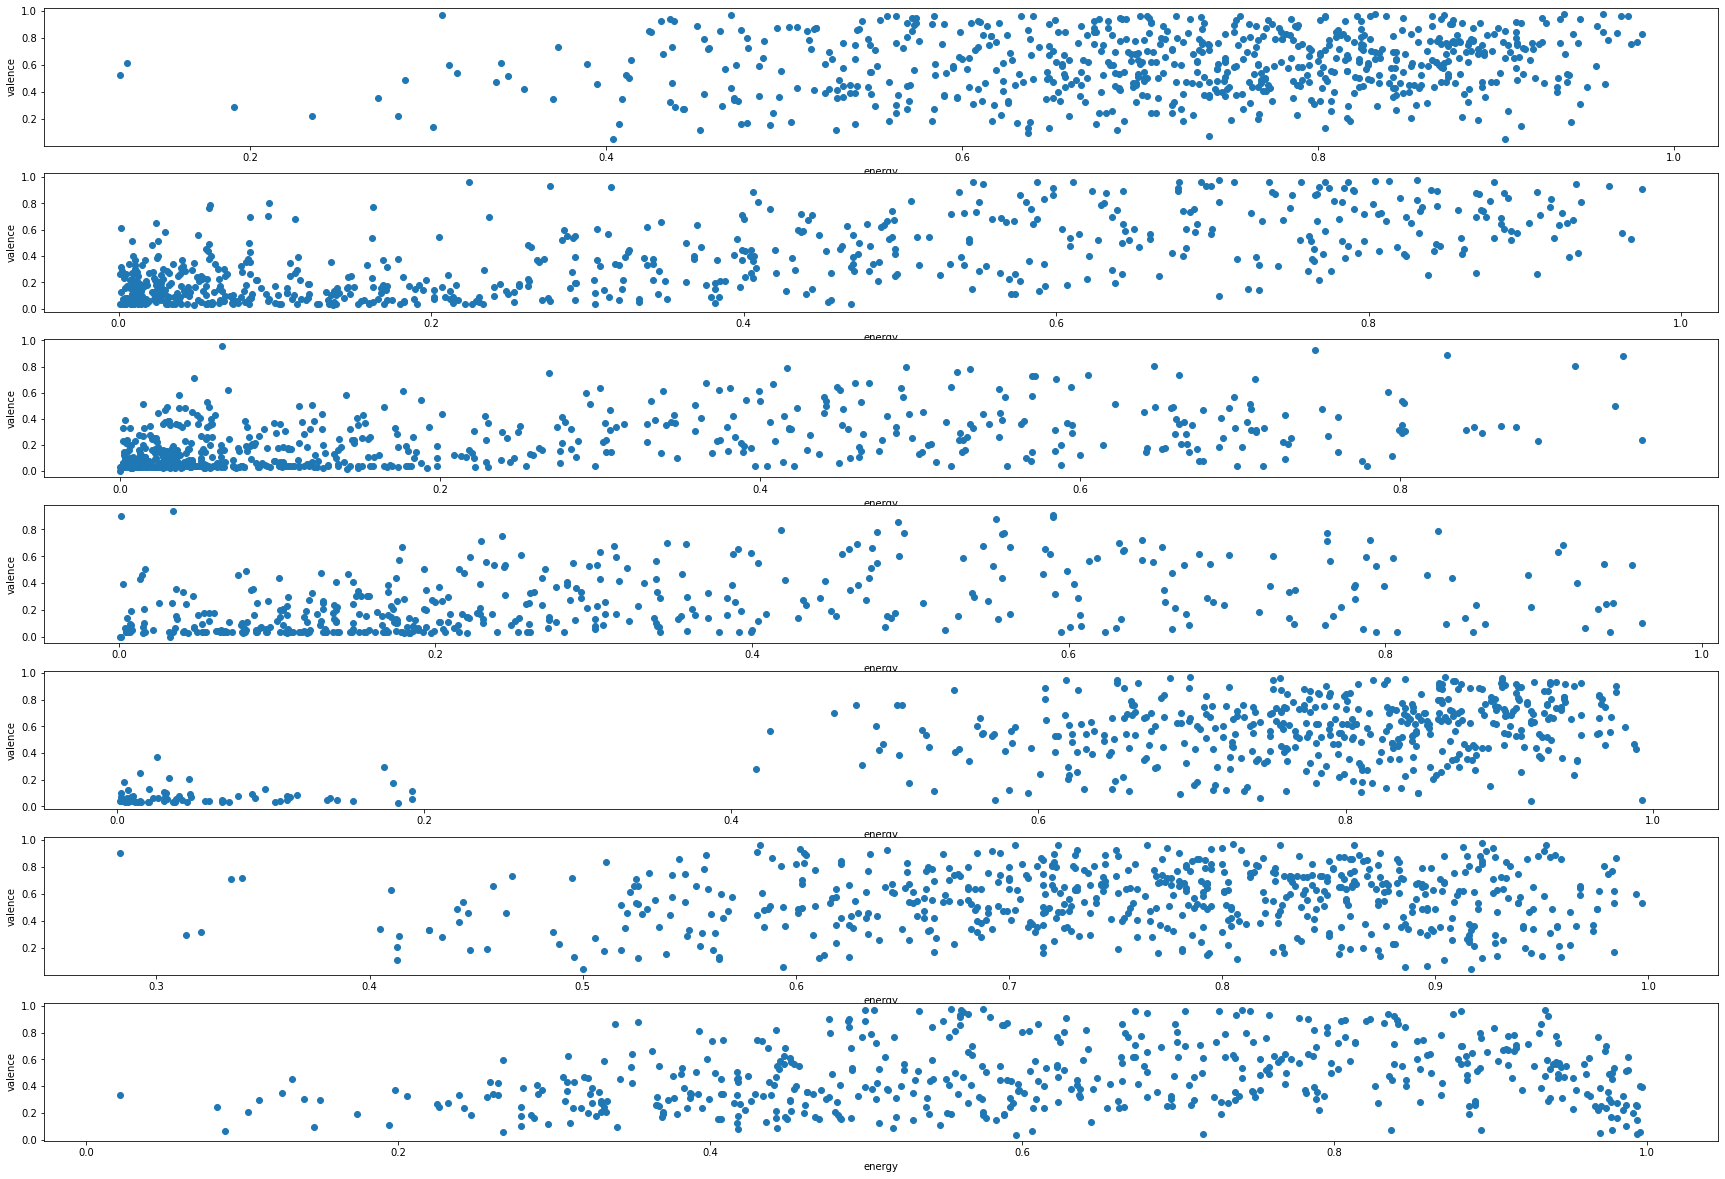

In [14]:
import matplotlib.pyplot as plt
#import sklearn.cluster as skc

#centroids = []

plt.figure(1, figsize=(30,30))

def draw_scatters(counter: list, df: pandas.DataFrame):
    
    curpos = 0
    cc = 1

    for c in counter:
        df_single_mood = df[curpos:curpos + c]
        df_single_mood = df_single_mood[['energy', 'valence']].astype('float')
        
        curpos += c
        
        plt.subplot(10, 1, cc)
        plt.scatter([float(x) for x in df_single_mood['energy']], [float (x) for x in df_single_mood['valence']])
        plt.xlabel('energy')
        plt.ylabel('valence')
        
        cc += 1
        
draw_scatters(counter, df_en_val)

#m, a = df3['energy'].mean(), df3['valence'].mean()
#s1, s2 = df3['energy'].std(), df3['valence'].std()
#centroids.append((m, a, s1, s2))
##centroid = skc.KMeans(n_clusters=1, init='k-means++', random_state=0).fit(df3[['energy', 'valence']])
##centroids.append(centroid.cluster_centers_)

In [16]:
#normalize and standardize possible outliers
df.loc[:, 'key'] = (df.key - df.key.min()) / (df.key.max() - df.key.min())
df.loc[:, 'loudness'] = (df.loudness - df.loudness.min()) / (df.loudness.max() - df.loudness.min())
df.loc[:, 'tempo'] = (df.tempo - df.tempo.min()) / (df.tempo.max() - df.tempo.min())

#outliers detection based on zscore on all features
from scipy import stats
import math

#to check how many will be cut off
counter = count_songs_for_mood(df)
print(counter)

df_no_id = df.loc[:, ['mood', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
df_no_id.iloc[:, 1:11] = df_no_id.iloc[:, 1:11].astype('float')

#empty DataFrame, to be built with next for cycle
df_to_build = pandas.DataFrame()

#remove outliers based on z-score on every feature
curpos = 0
for c in counter:

    df_no_id_single_mood = df_no_id.iloc[curpos:curpos+c, 1:11]
    z = np.abs(stats.zscore(df_no_id_single_mood))

    threshold = 3

    df_no_id_single_mood = df_no_id_single_mood[(z < threshold).all(axis=1)]
    df_no_id_single_mood = df_no_id_single_mood.merge(df_no_id.iloc[curpos:curpos+c], on=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df_no_id_single_mood.drop_duplicates(inplace=True)
    df_to_build = pandas.concat([df_to_build, df_no_id_single_mood])

    curpos += c
    
counter = count_songs_for_mood(df_to_build)
print(counter)

[887, 833, 848, 605, 696, 772, 693]
[803, 771, 815, 535, 615, 744, 636]


In [18]:
#outliers detection based on zscore on energy and valence

#to check how many will be cut off
counter = count_songs_for_mood(df)
print(counter)

df_no_id_en_val = df.loc[:, ['mood', 'energy', 'valence']]
df_no_id_en_val.iloc[:, 1:3] = df_no_id_en_val.iloc[:, 1:3].astype('float')

#empty DataFrame, to be built with next for cycle
df_to_build_en_val = pandas.DataFrame()

#remove outliers based on z-score on energy and valence features
curpos = 0
for c in counter:
    df_no_id_en_val_single_mood = df_no_id_en_val.iloc[curpos:curpos+c, 1:3]
    z = np.abs(stats.zscore(df_no_id_en_val_single_mood))

    threshold = 1.5

    df_no_id_en_val_single_mood = df_no_id_en_val_single_mood[(z < threshold).all(axis=1)]
    df_no_id_en_val_single_mood = df_no_id_en_val_single_mood.merge(df_no_id_en_val.iloc[curpos:curpos+c], on=['energy', 'valence'])
    df_no_id_en_val_single_mood.drop_duplicates(inplace=True)
    df_to_build_en_val = pandas.concat([df_to_build_en_val, df_no_id_en_val_single_mood])

    curpos += c
    
counter = count_songs_for_mood(df_to_build_en_val)
print(counter)

[887, 833, 848, 605, 696, 772, 693]
[686, 674, 687, 454, 533, 621, 529]


In [ ]:
plt.figure(1, figsize=(30,30))

draw_scatters(counter, df_to_build_en_val)

In [17]:
from sklearn.model_selection import train_test_split
y, X = df_to_build_en_val['mood'], df_to_build_en_val[['energy', 'valence']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#1: Normalize >1 data :check:
#2: balance data quantity
#3: get rid of dubious emotions :check:
#4: use better & more models :check:
y2, X2 = df_to_build['mood'], df_to_build.iloc[:, :10]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [32]:
def fit_classifiers(X_train: pandas.DataFrame, y_train: pandas.DataFrame, X_test: pandas.DataFrame, y_test: pandas.DataFrame):
    
    classifier_names = ['DecisionTreeClassifier', 'SVC', 'MultinomialNB', 'RandomForestClassifier', 'KNeighborsClassifier',
                        'GaussianProcessClassifier', 'QuadraticDiscriminantAnalysis', 'AdaBoostClassifier', 'MLPClassifier']
    
    classifiers = [DecisionTreeClassifier(), SVC(gamma='auto', probability=True), MultinomialNB(), RandomForestClassifier(),
                   KNeighborsClassifier(), GaussianProcessClassifier(), QuadraticDiscriminantAnalysis(), AdaBoostClassifier(),
                   MLPClassifier(max_iter=1000)]
    
    test_scores = []
    
    for clf in range(len(classifiers)):
        
        classifiers[clf].fit(X_train, y_train)
        print(classifier_names[clf]+':')
        print("TRAIN SET", classifiers[clf].score(X_train, y_train))
        test_score = classifiers[clf].score(X_test, y_test)
        print("TEST SET", test_score)
        test_scores.append(test_score)
        print('\n\n')
        
    max = 0
    id = 0
    for i in range(len(test_scores)):
        if test_scores[i] > max:
            id = i
            max = test_scores[i]
        
    return classifiers

In [33]:
best_clf_en_val = fit_classifiers(X_train, y_train, X_test, y_test)
best_clf = fit_classifiers(X2_train, y2_train, X2_test, y2_test)

DecisionTreeClassifier:
TRAIN SET 0.9946485907955762
TEST SET 0.41202027516292544



SVC:
TRAIN SET 0.4366749910809847
TEST SET 0.4380883417813179



MultinomialNB:
TRAIN SET 0.17338565822333216
TEST SET 0.18247646632874728



RandomForestClassifier:
TRAIN SET 0.9942918301819479
TEST SET 0.4344677769732078



KNeighborsClassifier:
TRAIN SET 0.5982875490545844
TEST SET 0.42577842143374367



GaussianProcessClassifier:
TRAIN SET 0.4420264002854085
TEST SET 0.4561911658218682



QuadraticDiscriminantAnalysis:
TRAIN SET 0.4306100606493043
TEST SET 0.44677769732078204



AdaBoostClassifier:
TRAIN SET 0.38458794149125936
TEST SET 0.36857349746560464



MLPClassifier:
TRAIN SET 0.42739921512665
TEST SET 0.44243301955104997



DecisionTreeClassifier:
TRAIN SET 0.9984825493171472
TEST SET 0.45935960591133007



SVC:
TRAIN SET 0.4952959028831563
TEST SET 0.4944581280788177



MultinomialNB:
TRAIN SET 0.4315629742033384
TEST SET 0.4458128078817734



RandomForestClassifier:
TRAIN SET 0.9984825493

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

select = SelectKBest(f_classif, k=5)
select.fit(X2_train, y2_train)
mask = select.get_support()
print(mask)

df_cpy = df_to_build_en_val.copy()

y3, X3 = df_cpy['mood'], df_cpy[['energy', 'valence']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.33, random_state=42)

clf = RandomForestClassifier()
clf = clf.fit(X3_train, y3_train)

print("TRAIN SET", clf.score(X3_train, y3_train))
print("TEST SET", clf.score(X3_test, y3_test))

[False  True False  True False False  True  True  True False]
TRAIN SET 0.9946485907955762
TEST SET 0.4402606806661839


In [28]:
select = SelectKBest(f_classif, k=2)
select.fit(X2_train, y2_train)
mask = select.get_support()
print(mask)

df.describe()

[False  True False False False False False  True False False]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000
mean,0.578259,0.519730,0.480025,0.739264,0.648106,0.068794,0.419180,0.265268,0.438362,0.533991
std,0.197186,0.292882,0.327449,0.188425,0.477606,0.066431,0.370896,0.393071,0.276637,0.131259
min,0.000000,0.000127,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
25%,0.459000,0.276000,0.181818,0.682846,0.000000,0.036225,0.056100,0.000000,0.196000,0.440114
50%,0.622500,0.573500,0.454545,0.815567,1.000000,0.045000,0.307000,0.000139,0.417000,0.545218
75%,0.727000,0.766000,0.727273,0.867465,1.000000,0.067375,0.818000,0.770750,0.667750,0.600111
max,0.981000,0.997000,1.000000,1.000000,1.000000,0.758000,0.996000,0.997000,0.980000,1.000000


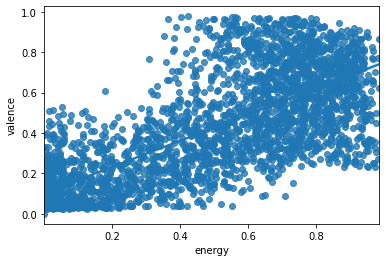

In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train['energy'], X_train['valence'])
sns.regplot(X_train['energy'], X_train['valence'])
plt.show()

In [56]:
#TODO:
#-rivedere moods e aumentare classi :check:
#-funzione per addestrare classificatore e poi fare for con tutti :check:
#-testing "a mano" :check:
#-più grafici

#Testing a mano
title = input('Song title: ')
artist = input('Song artist: ')
uri = ''

search_query = title + ' ' + artist
result = sp.search(search_query)

for i in result['tracks']['items']:
    # Find a song that matches title and artist
    if (i['artists'][0]['name'] == artist) and (i['name'] == title):
        uri = i['uri']
        break
else:
    try:
        # Just take the first song returned by the search (might be named differently)
        uri = result['tracks']['items'][0]['uri']
    except:
        # No results for artist and title
        print ("Cannot Find URI")

features = sp.audio_features(uri)
song = []

if (features[0] != None):
    song.append([features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
    array = np.array(song)
    df_app = pandas.DataFrame(array, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    print ("Best_clf:")
    for j in best_clf:
        prediction = j.predict(df_app)
        print(prediction)
    print ("Best_clf_en_val:") 
    for j in best_clf_en_val:
        prediction = j.predict(df_app.loc[:,['energy','valence']])
        print(prediction)

Best_clf:
['romantic']
['focus']
['sad']
['sad']
['focus']
['sad']
['focus']
['happy']
['focus']
Best_clf_en_val:


ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 10 